In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('train_titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
m=df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.duplicated().sum()

0

seperate x and y

In [10]:
x=df.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin'])
y=df[['Survived']]

In [11]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [12]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


cat and con seperation

In [16]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])

In [17]:
cat

['Sex', 'Embarked']

In [18]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [19]:
creating pipeline for x

SyntaxError: invalid syntax (3295176760.py, line 1)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scaler',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(handle_unknown='ignore'))])

In [22]:
pre=ColumnTransformer([('num',num_pipe,con),('cat',cat_pipe,cat)])

In [23]:
x_pre=pre.fit_transform(x)
x_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
cols=pre.get_feature_names_out()

In [25]:
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'], dtype=object)

In [26]:
x_pre=pd.DataFrame(x_pre,columns=cols)

In [27]:
x_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,1.0,0.0,0.0,0.0,1.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,1.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.0,1.0,1.0,0.0,0.0


In [28]:
y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

train test split

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [30]:
ytrain.value_counts()

Survived
0           444
1           268
Name: count, dtype: int64

In [31]:
ytest.value_counts()

Survived
0           105
1            74
Name: count, dtype: int64

creating gradient boosting model

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(learning_rate=0.001,n_estimators=1,max_depth=2,min_samples_split=5,min_samples_leaf=5)

In [33]:
model.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.001, max_depth=2, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [34]:
model.score(xtrain,ytrain)

0.6235955056179775

In [35]:
model.score(xtest,ytest)

0.5865921787709497

hyperparameter tunning

In [40]:
params={'learning_rate':[0.01,0.05,0.1,0.2],
        'n_estimators':[10,50,100,200],
        'max_depth':[2,3,4,5,6,7],
        'min_samples_split':[5,6,7,8,9,10]}

In [41]:
from sklearn.model_selection import RandomizedSearchCV
gbc=GradientBoostingClassifier()
rscv=RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1_macro')

In [42]:
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [43]:
rscv.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_split=7)

In [44]:
rscv.best_score_

0.8018972213641582

In [45]:
best_gbc=rscv.best_estimator_

In [46]:
best_gbc

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_split=7)

evaluate model performacnce

In [48]:
best_gbc.score(xtrain,ytrain)

0.901685393258427

In [49]:
best_gbc.score(xtest,ytest)

0.8156424581005587

predict train and test result

In [50]:
ypred_tr=best_gbc.predict(xtrain)

In [51]:
ypred_ts=best_gbc.predict(xtest)

In [52]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [53]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [54]:
ypred_ts[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [55]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


check confusion matrix

In [57]:
c=best_gbc.classes_

In [58]:
c

array([0, 1], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

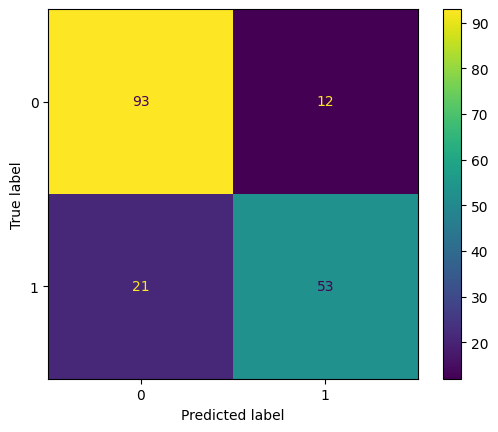

In [60]:
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=c)
cfd.plot()

check classification report

In [61]:
from sklearn.metrics  import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



predicting out of sample data

In [62]:
xnew=pd.read_csv('test_titanic.csv')

In [63]:
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
xnew_pre=pre.transform(xnew)
xnew_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  1.        ,
         0.        ,  0.        ]])

In [65]:
xnew_pre=pd.DataFrame(xnew_pre,columns=cols)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


predicting the result

In [66]:
pred=best_gbc.predict(xnew_pre)
pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
prob=best_gbc.predict_proba(xnew_pre)

In [68]:
prob

array([[0.91164259, 0.08835741],
       [0.30964871, 0.69035129],
       [0.8651847 , 0.1348153 ],
       [0.81983201, 0.18016799],
       [0.64418602, 0.35581398],
       [0.89727656, 0.10272344],
       [0.4976308 , 0.5023692 ],
       [0.90903304, 0.09096696],
       [0.16113214, 0.83886786],
       [0.89820261, 0.10179739],
       [0.88835872, 0.11164128],
       [0.87009668, 0.12990332],
       [0.06087252, 0.93912748],
       [0.867803  , 0.132197  ],
       [0.05558521, 0.94441479],
       [0.09354841, 0.90645159],
       [0.89244423, 0.10755577],
       [0.7485758 , 0.2514242 ],
       [0.52578096, 0.47421904],
       [0.32116687, 0.67883313],
       [0.70979348, 0.29020652],
       [0.4553909 , 0.5446091 ],
       [0.05945548, 0.94054452],
       [0.64002977, 0.35997023],
       [0.03731343, 0.96268657],
       [0.89283813, 0.10716187],
       [0.04223728, 0.95776272],
       [0.7485758 , 0.2514242 ],
       [0.60897025, 0.39102975],
       [0.83323112, 0.16676888],
       [0.

In [69]:
prob=best_gbc.predict_proba(xnew_pre)[:,1]
prob[0:5]

array([0.08835741, 0.69035129, 0.1348153 , 0.18016799, 0.35581398])

save above result in dataframe

In [70]:
df_final=xnew[['PassengerId']]

In [71]:
df_final['Survived_pred']=pred
df_final['Survived-prob']=prob

<Axes: title={'center': 'pred_survived'}, xlabel='Survived_pred'>

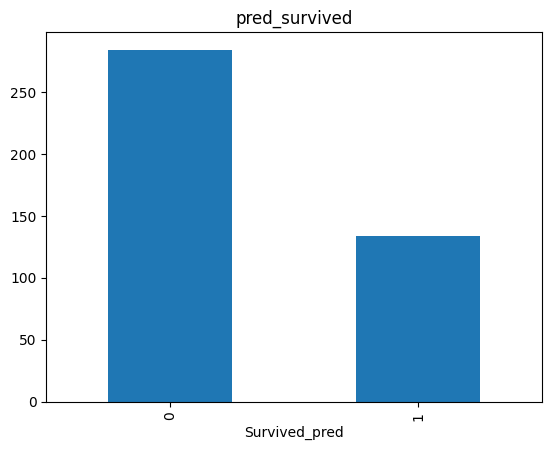

In [72]:
df_final['Survived_pred'].value_counts().plot(kind='bar',title='pred_survived')

saving to csv

In [76]:
df_final.to_csv('gbcresult.csv',index=False)

feature importance

In [74]:
imp=best_gbc.feature_importances_
imp

array([0.15021442, 0.12758567, 0.05491719, 0.00764132, 0.17751781,
       0.15853271, 0.30436805, 0.00453078, 0.00442849, 0.01026356])

In [75]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [77]:
imp=pd.Series(imp)
imp.index=xtrain.columns
imp=imp.sort_values(ascending=False)
imp

cat__Sex_male      0.304368
num__Fare          0.177518
cat__Sex_female    0.158533
num__Pclass        0.150214
num__Age           0.127586
num__SibSp         0.054917
cat__Embarked_S    0.010264
num__Parch         0.007641
cat__Embarked_C    0.004531
cat__Embarked_Q    0.004428
dtype: float64

<Axes: title={'center': 'Featureimp'}>

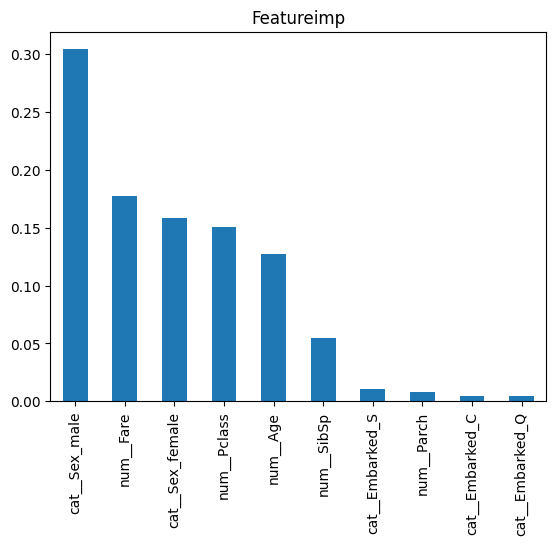

In [78]:
imp.plot(kind='bar',title='Featureimp')